<a href="https://colab.research.google.com/github/Belldenchoi/Text_Classification_Transformer/blob/main/Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip -d data/

Archive:  archive.zip
  inflating: data/data.csv           


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import seaborn as sns
import re
import string
from collections import Counter, defaultdict
import os

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot

import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt

In [ ]:
import re
from typing import Union, List

def preprocess_text(text):
    replace_chars = list(string.punctuation + string.digits)
    for char in replace_chars:
      text = text.replace(char, " ")

    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

    text = emoj.sub(r" ", text)

    text = " ".join(text.split())

    text = text.lower()
    return text


In [ ]:
pip install torchtext==0.17.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 115.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import torchtext
from torchtext.data.utils import get_tokenizer

tokenizer = get_tokenizer('basic_english')


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.12/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.12/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.12/dist-package

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
!pip install datasets

from datasets import load_dataset
ds = load_dataset('thainq107/ntc-scv')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning:


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.



README.md:   0%|          | 0.00/570 [00:00<?, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.8M [00:00<?, ?B/s]

data/valid-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/6.35M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating valid split:   0%|          | 0/10000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/10000 [00:00<?, ? examples/s]

In [ ]:
from torchtext.vocab import build_vocab_from_iterator

In [ ]:
def yield_tokens(sentences, tokenizer):
  for sentence in sentences:
    yield tokenizer(sentence)

In [ ]:
vocab_size = 10000
vocabulary = build_vocab_from_iterator(
    yield_tokens(ds['train']['preprocessed_sentence'], tokenizer),
    max_tokens = vocab_size,
    specials= ["<pad>", "<unk>"]
)

In [ ]:
vocabulary.set_default_index(vocabulary["<unk>"])

In [ ]:
from torchtext.data.functional import to_map_style_dataset

In [ ]:
ds

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label', 'preprocessed_sentence'],
        num_rows: 30000
    })
    valid: Dataset({
        features: ['sentence', 'label', 'preprocessed_sentence'],
        num_rows: 10000
    })
    test: Dataset({
        features: ['sentence', 'label', 'preprocessed_sentence'],
        num_rows: 10000
    })
})

In [ ]:
def prepare_dataset(df):
  for row in df:
    sentence = row['preprocessed_sentence']
    encoded_sentence = vocabulary(tokenizer(sentence))
    label = row['label']
    yield encoded_sentence, label

train_dataset = prepare_dataset(ds['train'])
train_dataset = to_map_style_dataset(train_dataset)

valid_dataset = prepare_dataset(ds['valid'])
valid_dataset = to_map_style_dataset(valid_dataset)

test_dataset = prepare_dataset(ds['test'])
test_dataset = to_map_style_dataset(test_dataset)

In [ ]:
import torch

In [ ]:
import torch.nn as nn

In [ ]:
seq_length = 100

def collate_batch(batch):
  sentences, labels = list(zip(*batch))

  encoded_sentences = [sentence + ([0] * (seq_length - len(sentence))) if len(sentence) < seq_length else sentence[:seq_length] for sentence in sentences]

  encoded_sentences = torch.tensor(encoded_sentences, dtype=torch.int64)
  labels = torch.tensor(labels)

  return encoded_sentences, labels

from torch.utils.data import DataLoader

batch_size = 128

train_dataloader = DataLoader(
    train_dataset,
    batch_size = batch_size,
    shuffle=True,
    collate_fn=collate_batch
)

valid_dataloader = DataLoader(
    valid_dataset,
    batch_size = batch_size,
    shuffle=False,
    collate_fn=collate_batch
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size = batch_size,
    shuffle=True,
    collate_fn=collate_batch
)

In [ ]:
class TokenAndPositionEmbedding(nn.Module):
  def __init__(self, vocab_size, embed_dim, max_length, device = 'cpu'):
    super().__init__()
    self.device = device
    self.word_emb = nn.Embedding(
        num_embeddings= vocab_size,
        embedding_dim= embed_dim
    )

    self.pos_emb = nn.Embedding(
        num_embeddings=max_length,
        embedding_dim= embed_dim
    )

  def forward(self, x):
    N, seq_len = x.size()
    positions = torch.arange(0, seq_len).expand(N, seq_len).to(self.device)
    output1 = self.word_emb(x)
    output2 = self.pos_emb(positions)
    output = output1 + output2
    return output


In [ ]:
class TransformerEncoderBlock(nn.Module):
  def __init__(self, embed_dim, num_heads, ff_dim, dropout = 0.1):
    super().__init__()
    self.attn = nn.MultiheadAttention(
        embed_dim = embed_dim,
        num_heads = num_heads,
        batch_first=True
    )

    self.ffn = nn.Sequential(
        nn.Linear(in_features=embed_dim, out_features=ff_dim, bias=True),
        nn.ReLU(),
        nn.Linear(in_features=ff_dim, out_features=embed_dim, bias=True)
    )
    self.layernorm_1 = nn.LayerNorm(normalized_shape=embed_dim, eps = 1e-6)
    self.layernorm_2 = nn.LayerNorm(normalized_shape=embed_dim, eps = 1e-6)
    self.dropout_1 = nn.Dropout(p = dropout)
    self.dropout_2 = nn.Dropout(p = dropout)

  def forward(self, query, key, value):
    attn_output, _ = self.attn(query, key, value)
    attn_output = self.dropout_1(attn_output)
    out_1 = self.layernorm_1(query + attn_output)
    ffn_output = self.ffn(out_1)
    ffn_output = self.dropout_2(ffn_output)
    out_2 = self.layernorm_2(out_1 + ffn_output)
    return out_2

class TransformerEncoder(nn.Module):
  def __init__(self, src_vocab_size, embed_dim, max_length, num_layers, num_heads, ff_dim, dropout = 0.1, device = 'cpu'):
    super().__init__()
    self.embedding = TokenAndPositionEmbedding(
        src_vocab_size, embed_dim, max_length, device
    )

    self.layers = nn.ModuleList(
        [
            TransformerEncoderBlock(
                embed_dim, num_heads, ff_dim, dropout
            ) for i in range(num_layers)
        ]
    )

  def forward(self, x):
    output = self.embedding(x)
    for layer in self.layers:
        output = layer(output, output, output)
    return output

In [ ]:
class TransformerEncoderCls(nn.Module):
  def __init__(self, vocab_size, max_length, num_layers, embed_dim, num_heads, ff_dim, dropout = 0.1, device = 'cpu'):
    super().__init__()
    self.encoder = TransformerEncoder(
        vocab_size, embed_dim, max_length, num_layers, num_heads, ff_dim, dropout, device
    )
    self.pooling = nn.AvgPool1d(kernel_size=max_length)
    self.fc1 = nn.Linear(in_features=embed_dim, out_features=20)
    self.fc2 = nn.Linear(in_features=20, out_features=2)
    self.dropout = nn.Dropout(p = dropout)
    self.relu = nn.ReLU()

  def forward(self, x):
    output = self.encoder(x)
    output = self.pooling(output.permute(0,2,1)).squeeze()
    output = self.dropout(output)
    output = self.fc1(output)
    output = self.dropout(output)
    output = self.fc2(output)

    return output

In [ ]:
import time

def train_epoch(model, optimizer, criterion, train_dataloader, device, epoch = 0, log_interval = 50):
    model.train()
    total_acc, total_count = 0, 0
    losses = []
    start_time = time.time()

    for idx, (inputs, labels) in enumerate(train_dataloader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      optimizer.zero_grad()
      predictions = model(inputs)

      loss = criterion(predictions, labels)
      losses.append(loss.item())

      loss.backward()
      optimizer.step()

      total_acc += (predictions.argmax(1) == labels).sum().item()
      total_count += labels.size(0)

      if idx % log_interval == 0 and idx > 0:
        elapsed = time.time() - start_time
        print(
            "| epoch {:3d} | {:5d}/{:5d} batches "
            "| accuracy {:8.3f}".format(
                epoch, idx, len(train_dataloader), total_acc / total_count
            )
        )
        total_acc, total_count = 0, 0
        start_time = time.time()

    epoch_acc = total_acc / total_count
    epoch_loss = sum(losses) / len(losses)
    return epoch_acc, epoch_loss


def evaluate_epoch(model, criterion , valid_dataloader, device):
  model.eval()
  total_acc, total_count = 0,0
  losses = []

  with torch.no_grad():
    for idx, (inputs, labels) in enumerate(valid_dataloader):
      inputs = inputs.to(device)
      labels = labels.to(device)

      predictions = model(inputs)

      loss = criterion(predictions, labels)
      losses.append(loss.item())

      total_acc += (predictions.argmax(1) == labels).sum().item()
      total_count += labels.size(0)

  epoch_acc = total_acc/total_count
  epoch_loss = sum(losses)/len(losses)
  return epoch_acc, epoch_loss

def train(model, model_name, save_model, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device):
  train_accs , train_losses = [], []
  eval_accs , eval_losses = [], []
  best_loss_eval = 100
  times = []

  for epoch in range(1, num_epochs + 1):
    epoch_start_time = time.time()

    train_acc, train_loss = train_epoch(model, optimizer, criterion, train_dataloader, device, epoch)
    train_accs.append(train_acc)
    train_losses.append(train_loss)

    eval_acc, eval_loss = evaluate_epoch(model, criterion, valid_dataloader, device)
    eval_accs.append(eval_acc)
    eval_losses.append(eval_loss)

    if eval_loss < best_loss_eval:
      torch.save(model.state_dict(), save_model + f'/{model_name}.pt')

    times.append(time.time() - epoch_start_time)
    print("-" * 59)

    print(
        "| End of epoch {:3d} | Time: {:5.2f}s | Train Accuracy {:8.3f} | Train Loss {:8.3f} "
        "| Valid Accuracy {:8.3f} | Valid Loss {:8.3f} ".format(
            epoch, time.time() - epoch_start_time, train_acc, train_loss, eval_acc, eval_loss
        )
    )
    print("-" * 59)

  model.load_state_dict(torch.load(save_model + f'/{model_name}.pt'))
  model.eval()

  metrics = {
      'train_accuracy': train_accs,
      'train_loss': train_losses,
      'valid_accuracy': eval_accs,
      'valid_loss': eval_losses,
      'time': times
  }

  return model, metrics


import matplotlib.pyplot as plt

def plot_result(num_epochs, train_accs, eval_accs, train_losses, eval_losses):
  epochs = list(range(num_epochs))
  fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))

  axs[0].plot(epochs, train_accs, label = "Training")
  axs[0].plot(epochs, eval_accs, label = "Evaluation")
  axs[1].plot(epochs, train_losses, label = "Training")
  axs[1].plot(epochs, eval_losses, label = "Evaluation")
  axs[0].set_xlabel("Epochs")
  axs[1].set_xlabel("Epochs")
  axs[0].set_ylabel("Accuracy")
  axs[1].set_ylabel("Loss")
  plt.legend()

In [ ]:
import torch.optim as optim

vocab_size = 10000
max_length = 100
embed_dim = 200
num_layers = 2
num_heads = 4
ff_dim = 128
dropout = 0.1


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

model = TransformerEncoderCls(
    vocab_size, max_length, num_layers, embed_dim, num_heads, ff_dim, dropout, device)

model.to(device)

criterion = nn.CrossEntropyLoss(label_smoothing=0.1)
optimizer = optim.Adam(model.parameters(), lr=5e-5)

num_epochs = 30
save_model = './model'
os.makedirs(save_model, exist_ok = True)
model_name = "model"

model, metrics = train(
    model, model_name, save_model, optimizer, criterion, train_dataloader, valid_dataloader, num_epochs, device
)


| epoch   1 |    50/  235 batches | accuracy    0.550
| epoch   1 |   100/  235 batches | accuracy    0.596
| epoch   1 |   150/  235 batches | accuracy    0.666
| epoch   1 |   200/  235 batches | accuracy    0.715
-----------------------------------------------------------
| End of epoch   1 | Time:  4.30s | Train Accuracy    0.723 | Train Loss    0.656 | Valid Accuracy    0.752 | Valid Loss    0.569 
-----------------------------------------------------------
| epoch   2 |    50/  235 batches | accuracy    0.756
| epoch   2 |   100/  235 batches | accuracy    0.790
| epoch   2 |   150/  235 batches | accuracy    0.798
| epoch   2 |   200/  235 batches | accuracy    0.802
-----------------------------------------------------------
| End of epoch   2 | Time:  4.31s | Train Accuracy    0.811 | Train Loss    0.515 | Valid Accuracy    0.804 | Valid Loss    0.501 
-----------------------------------------------------------
| epoch   3 |    50/  235 batches | accuracy    0.809
| epoch   3 

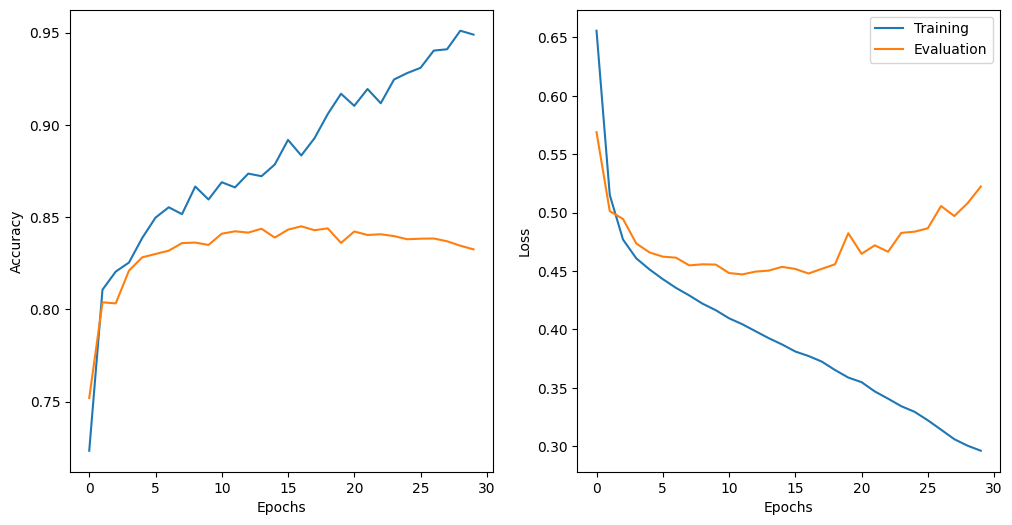

In [ ]:
plot_result(num_epochs, metrics['train_accuracy'], metrics['valid_accuracy'], metrics['train_loss'], metrics['valid_loss'])